<a href="https://colab.research.google.com/github/leonTan21/real-estate-data-analysis/blob/main/Realtor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring Realtor Dataset

Download datasets

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import packages: pandas,matplotlib,seaborn



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Reading and exploring overall structure of the dataset

In [9]:
import pandas as pd

file_path = '/content/drive/MyDrive/realtor.csv'
data = pd.read_csv(file_path)
data.info()
data.describe(include="all")
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


Specify type of variable




1.   status : categorical (nominal)
2.   price : numeric (ratio)
3. bed : numeric (ratio)
4. bath : numeric (ratio)
5. acre_lot : numeric (ratio)
6. full_address : categorical (nominal)
7. street : categorical (nominal)
8. city : categorical (nominal)
9. state : categorical (nominal)
10. zip_code : categorical (nominal)
11. house_size : numeric (ratio)
12. sold_date : numeric (interval-scaled)




Remove duplicate data

In [11]:
print(data.duplicated())
data.drop_duplicates(inplace=True)
print(data.info())

0         False
1         False
2         False
3         False
4         False
          ...  
923154     True
923155     True
923156     True
923157     True
923158     True
Length: 923159, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Index: 113789 entries, 0 to 923147
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        113789 non-null  object 
 1   price         113771 non-null  float64
 2   bed           96273 non-null   float64
 3   bath          97492 non-null   float64
 4   acre_lot      82666 non-null   float64
 5   full_address  113789 non-null  object 
 6   street        113278 non-null  object 
 7   city          113766 non-null  object 
 8   state         113789 non-null  object 
 9   zip_code      113756 non-null  float64
 10  house_size    77341 non-null   float64
 11  sold_date     59697 non-null   object 
dtypes: float64(6), object(6)
memory usage: 11.3+ MB
None


Missing values

In [15]:
print(data.isna().sum())
data = data.dropna()


status          0
price           0
bed             0
bath            0
acre_lot        0
full_address    0
street          0
city            0
state           0
zip_code        0
house_size      0
sold_date       0
dtype: int64


There are no missing values

Remove houses with price less or equal to 50K

In [16]:
expensive_houses = data[data['price'] > 50000]
data = expensive_houses
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32712 entries, 829 to 923147
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        32712 non-null  object 
 1   price         32712 non-null  float64
 2   bed           32712 non-null  float64
 3   bath          32712 non-null  float64
 4   acre_lot      32712 non-null  float64
 5   full_address  32712 non-null  object 
 6   street        32712 non-null  object 
 7   city          32712 non-null  object 
 8   state         32712 non-null  object 
 9   zip_code      32712 non-null  float64
 10  house_size    32712 non-null  float64
 11  sold_date     32712 non-null  object 
dtypes: float64(6), object(6)
memory usage: 3.2+ MB


Remove outliers using IQR method

In [17]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_no_outliers = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
print(data_no_outliers['price'].describe())


count    2.966400e+04
mean     4.720098e+05
std      2.755501e+05
min      5.100000e+04
25%      2.690000e+05
50%      3.990000e+05
75%      6.250000e+05
max      1.390000e+06
Name: price, dtype: float64


Percentage of observation missing for the price variable

In [18]:
missing_percentage = data_no_outliers['price'].isna().mean() * 100
print(f"Percentage of missing values in price: {missing_percentage:.2f}%")

Percentage of missing values in price: 0.00%


Draw a histogram and boxplot

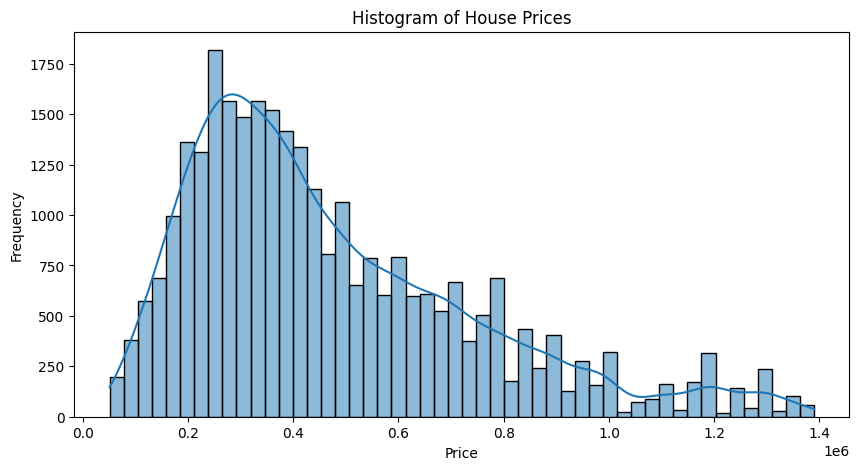

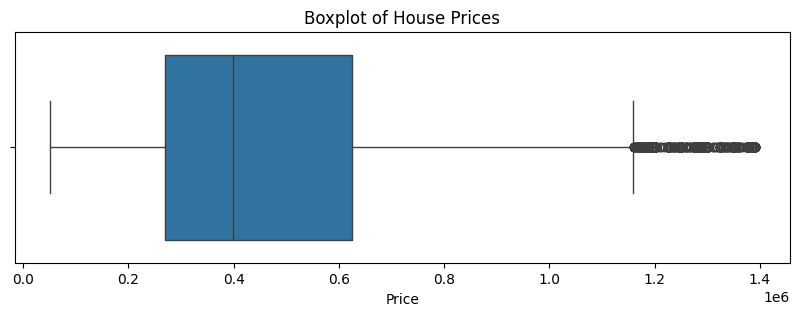

In [19]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data_no_outliers['price'], bins=50, kde=True)
plt.title("Histogram of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(10,3))
sns.boxplot(x=data_no_outliers['price'])
plt.title("Boxplot of House Prices")
plt.xlabel("Price")
plt.show()

They are negatively skewed

Convert sold_date varible to date/time type, then create two new variables sold_year and sold_month to store the year and the month that the house was sold

In [25]:
data = data_no_outliers.copy()
data.info()
data['sold_date'] = pd.to_datetime(
    data['sold_date'],
    errors='coerce'
)
data['sold_year'] = data['sold_date'].dt.year
data['sold_month'] = data['sold_date'].dt.month
print(data[['sold_date', 'sold_year', 'sold_month']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 29664 entries, 829 to 923136
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        29664 non-null  object 
 1   price         29664 non-null  float64
 2   bed           29664 non-null  float64
 3   bath          29664 non-null  float64
 4   acre_lot      29664 non-null  float64
 5   full_address  29664 non-null  object 
 6   street        29664 non-null  object 
 7   city          29664 non-null  object 
 8   state         29664 non-null  object 
 9   zip_code      29664 non-null  float64
 10  house_size    29664 non-null  float64
 11  sold_date     29664 non-null  object 
dtypes: float64(6), object(6)
memory usage: 2.9+ MB
       sold_date  sold_year  sold_month
829   2019-06-28       2019           6
10344 2013-10-11       2013          10
24237 2014-06-25       2014           6
24238 2012-10-12       2012          10
24244 1986-11-20       1986          11

Use value_counts to see observations for each state, remove states with only one observation, use value_counts again to show current number of observation

In [28]:
data = data[data['state'].map(data['state'].value_counts()) > 1]

# Check observations per state
print(data['state'].value_counts())


state
New Jersey       8599
Connecticut      5518
Pennsylvania     4952
New York         4594
Massachusetts    2556
Rhode Island     1213
Delaware          763
New Hampshire     667
Vermont           444
Maine             356
Name: count, dtype: int64


Significance difference between average price and states
We will use the ANOVA test and box plot and assume a significance level of 0.05

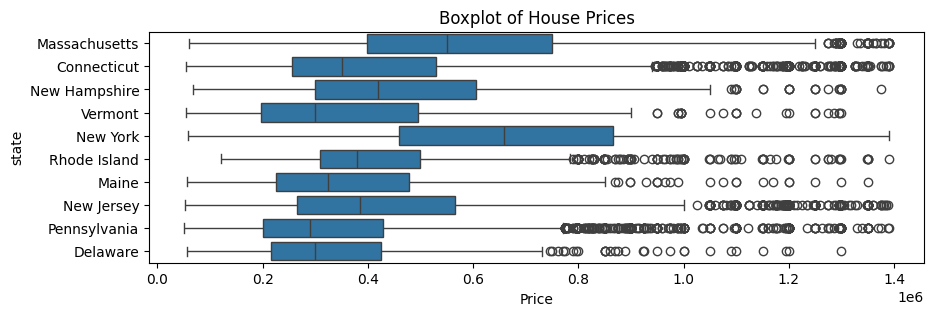

In [31]:
plt.figure(figsize=(10,3))
sns.boxplot(x=data['price'], y = data['state'])
plt.title("Boxplot of House Prices")
plt.xlabel("Price")
plt.show()

In [32]:
!pip install pingouin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.8 MB/s eta 0:00:00


In [33]:
import pingouin as pg

welch_anova = pg.welch_anova(dv='price', between='state', data=data)
print(welch_anova)
print("p-value:", welch_anova['p-unc'][0])

  Source  ddof1        ddof2           F  p-unc       np2
0  state      9  3614.206539  530.083821    0.0  0.151998
p-value: 0.0


p-value is smaller than the significance level (alpha=0.05) and so we CAN reject the null hypothesis.

Correlation between house price and the following:
sold_year,
house_size,
bed,
bath.
This is all association between numeric variables, so we will use scatter plots.

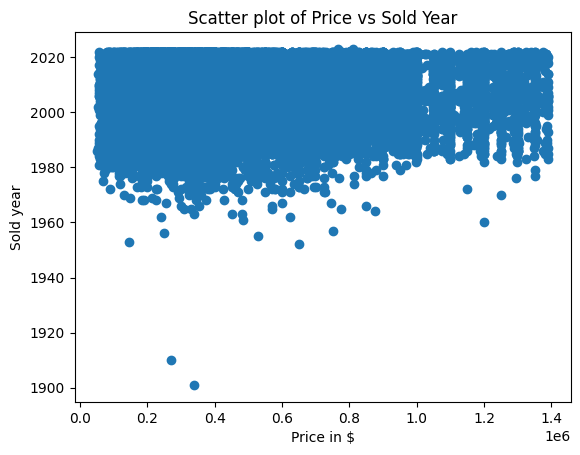

In [34]:
import matplotlib.pyplot as plt

plt.scatter(data['price'], data['sold_year'])
plt.title("Scatter plot of Price vs Sold Year")
plt.xlabel("Price in $")
plt.ylabel("Sold year")
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 29662 entries, 24237 to 923136
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   status        29662 non-null  object        
 1   price         29662 non-null  float64       
 2   bed           29662 non-null  float64       
 3   bath          29662 non-null  float64       
 4   acre_lot      29662 non-null  float64       
 5   full_address  29662 non-null  object        
 6   street        29662 non-null  object        
 7   city          29662 non-null  object        
 8   state         29662 non-null  object        
 9   zip_code      29662 non-null  float64       
 10  house_size    29662 non-null  float64       
 11  sold_date     29662 non-null  datetime64[ns]
 12  sold_year     29662 non-null  int32         
 13  sold_month    29662 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(2), object(5)
memory usage: 3.2+ MB
          

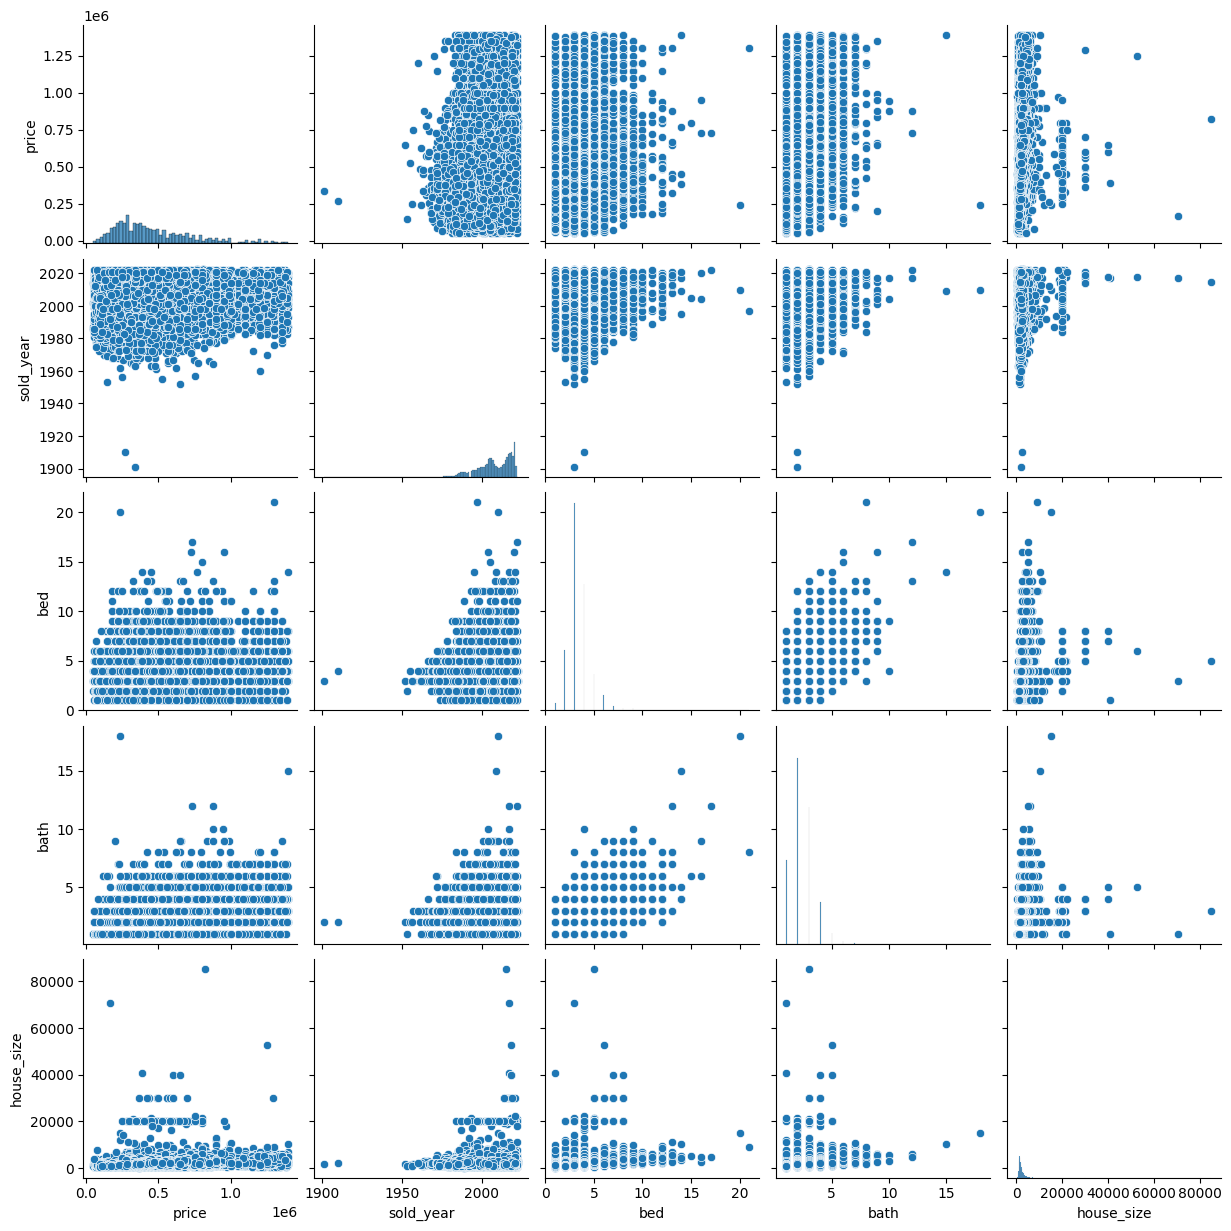

In [37]:
data.info()

numeric_attributes = data[['price', 'sold_year','bed','bath','house_size']]
cor_matrix = numeric_attributes.corr(method="pearson")
sns.pairplot(numeric_attributes)
print(cor_matrix)

To determine the association between price and house_size

In [36]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(data['price'], data['house_size'])

print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.3319848286453717
p-value: 0.0


Since p-value is < 0.05, we can safely reject the null hypothesis. There is significant corelation between price and house_size.

To determine association between price and sold_year, we will use pearsons correlation due to the linear relationship.

In [38]:
corr_coef, p_value = pearsonr(data['price'], data['sold_year'])

print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: -0.039247816200705776
p-value: 1.3625198203607127e-11


Since p-value is < 0.05, we can safely reject the null hypothesis. There is significant corelation between price and sold_year.

To determine association between price and bed, we will use pearsons correlation due to the linear relationship.

In [39]:
corr_coef, p_value = pearsonr(data['price'], data['bed'])

print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.30446200654349953
p-value: 0.0


Since p-value is < 0.05, we can safely reject the null hypothesis. There is significant corelation between price and bed.

To determine association between price and bath, we will use pearsons correlation due to the linear relationship.

In [40]:
corr_coef, p_value = pearsonr(data['price'], data['bath'])

print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.5570301690274341
p-value: 0.0


Since p-value is < 0.05, we can safely reject the null hypothesis. There is significant corelation between price and bath.